In [ ]:
pip install netCDF4

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install xarray

In [ ]:
pip install scipy

In [ ]:
pip install plotly

In [114]:
import netCDF4 as nc
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import scipy
import plotly.express as px
from scipy.stats import mstats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import csv
import fiona
import geopandas
#pd.set_option('display.max_rows', 200)




In [116]:
shapefile = "/Users/danielblanco/Documents/Mortality_Project/impact-regions-highres-full"
sf = geopandas.read_file(shapefile)
print(sf.head())

KeyboardInterrupt: 

In [90]:
#loading in dataset and isolation regions from hierarchy ID file
fn = "/Users/danielblanco/Documents/Mortality_Project/data/2_projection/3_impacts/main_specification/raw/single/rcp85/CCSM4/low/SSP3/Agespec_interaction_GMFD_POLY-4_TINV_CYA_NW_w1-oldest-aggregated.nc4"
fn1 = "/Users/danielblanco/Documents/Mortality_Project/data/2_projection/3_impacts/main_specification/raw/single/rcp85/CCSM4/low/SSP3/Agespec_interaction_GMFD_POLY-4_TINV_CYA_NW_w1-oldest-histclim-aggregated.nc4"

ds = xr.open_dataset(fn)
ds1 = xr.open_dataset(fn1)
df = ds.to_dataframe()
df1 = ds1.to_dataframe()
DEL = df.loc[df['regions'] =='IND.10.121']   #multiple versions for Dehli in aggregated version
OSL = df.loc[df['regions'] =='NOR.12']
CHI = df.loc[df['regions'] =='USA.14']        #listed as 'Cook' county
SPB = df.loc[df['regions'] =='BRA']  #double check aggregated version, unaggreagted version not listed as sao paulo
ACC = df.loc[df['regions'] =='GHA.5']
SYD = df.loc[df['regions'] =='AUS.4']    #unaggreageted version split into 
BEI = df.loc[df['regions'] == 'CHN.2']     #double check aggregated version, unaggregated version only has Miyun district
DEL1 = df1.loc[df['regions'] =='IND.10']
OSL1 = df1.loc[df['regions'] =='NOR.12']
CHI1 = df1.loc[df['regions'] =='USA.14']        
SPB1 = df1.loc[df['regions'] =='BRA']  
ACC1 = df1.loc[df['regions'] =='GHA.5']
SYD1 = df1.loc[df['regions'] =='AUS.4']    
BEI1 = df1.loc[df['regions'] == 'CHN.2']
CKT = df.loc[df['regions'] == 'IND.33'] #Chitrakoot, India

#take last 30yrs of diff (as an example), flatten it (use flatten function)
#one dimension is years of del, and years of del 1, want the difference between last 20 yrs of both
#del - del1, for last 30 years
#for loop to iterate for all time series (30yr windows)
#take 30yr window in for loop, do meshgrid, then flatten, center = true
#will extract climate signal, when does it emerge from 0



In [4]:
#ACC1['rebased'].plot()
#ACC['rebased'].plot()
ACC.reset_index()
ACC['regions']

year  region
1981  1919      GHA.5
1982  1919      GHA.5
1983  1919      GHA.5
1984  1919      GHA.5
1985  1919      GHA.5
                ...  
2096  1919      GHA.5
2097  1919      GHA.5
2098  1919      GHA.5
2099  1919      GHA.5
2100  1919      GHA.5
Name: regions, Length: 120, dtype: object

In [5]:
# Dummy var
xx,yy = np.meshgrid(CHI['rebased'],CHI['rebased'])
step=30
tot_len=len(xx[0])

diff1=[]
diff2=[]
for ii in range(tot_len):
    if ii == (tot_len - step):
        break #break loop if it exceeds window.
    else:
        diff=xx[0+ii:ii+step,:] - yy[0+ii:ii+step,:]
        quant17 = np.quantile(diff, 0.17)
        quant83 = np.quantile(diff, 0.83)
        diff1.append(quant17)
        diff2.append(quant83)

#stack all at once
diff17 = np.vstack(diff1)
diff83 = np.vstack(diff2)

data = pd.DataFrame(columns=['year','17th','83rd'])

data['year'] = CHI['regions'][30:]
data['17th'] = diff17
data['83rd'] = diff83



([<matplotlib.axis.XTick at 0x167b1c370>,
 [Text(39, 0, '2020'),
  Text(59, 0, '2040'),
  Text(79, 0, '2060'),
  Text(99, 0, '2080'),
  Text(119, 0, '2100')])

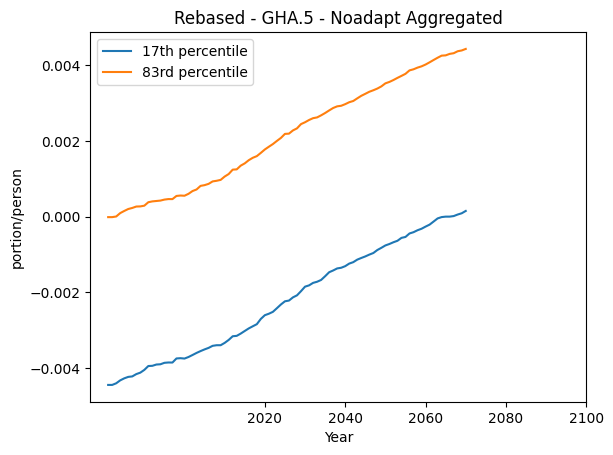

In [6]:
data['17th'].plot(label="17th percentile")
data['83rd'].plot(label="83rd percentile")

x = [39,59,79,99,119]
labels = ['2020', '2040','2060','2080','2100']
plt.title("Rebased - GHA.5 - Noadapt Aggregated")
plt.ylabel("portion/person")
plt.xlabel("Year")
plt.legend()
plt.xticks(x, labels)

In [7]:
# ACC['rebased']
xx = ACC['rebased']
xx

year  region
1981  1919     -0.000671
1982  1919     -0.000994
1983  1919     -0.000646
1984  1919     -0.000843
1985  1919     -0.001029
                  ...   
2096  1919      0.002827
2097  1919      0.000751
2098  1919      0.003210
2099  1919      0.003886
2100  1919      0.004111
Name: rebased, Length: 120, dtype: float32

In [91]:
#Taking 17th, 50th, and 83rd percentiles for all regions
#create loop to spit out three functions
DEL_rolling_17th = DEL['rebased'].rolling(window=30, center = False).quantile(0.17)
DEL_rolling_83rd = DEL['rebased'].rolling(window=30, center = False).quantile(0.83)
DEL_rolling_50th = DEL['rebased'].rolling(window=30, center = False).quantile(0.50)
OSL_rolling_17th = OSL['rebased'].rolling(window=30, center = False).quantile(0.17)
OSL_rolling_83rd = OSL['rebased'].rolling(window=30, center = False).quantile(0.83)
OSL_rolling_50th = OSL['rebased'].rolling(window=30, center = False).quantile(0.50)
CHI_rolling_17th = CHI['rebased'].rolling(window=30, center = False).quantile(0.17)
CHI_rolling_83rd = CHI['rebased'].rolling(window=30, center = False).quantile(0.83)
CHI_rolling_50th = CHI['rebased'].rolling(window=30, center = False).quantile(0.50)
SPB_rolling_17th = SPB['rebased'].rolling(window=30, center = False).quantile(0.17)
SPB_rolling_83rd = SPB['rebased'].rolling(window=30, center = False).quantile(0.83)
SPB_rolling_50th = SPB['rebased'].rolling(window=30, center = False).quantile(0.50)
ACC_rolling_17th = ACC['rebased'].rolling(window=30, center = False).quantile(0.17)
ACC_rolling_83rd = ACC['rebased'].rolling(window=30, center = False).quantile(0.83)
ACC_rolling_50th = ACC['rebased'].rolling(window=30, center = False).quantile(0.50)
SYD_rolling_17th = SYD['rebased'].rolling(window=30, center = False).quantile(0.17)
SYD_rolling_83rd = SYD['rebased'].rolling(window=30, center = False).quantile(0.83)
SYD_rolling_50th = SYD['rebased'].rolling(window=30, center = False).quantile(0.50)
BEI_rolling_17th = BEI['rebased'].rolling(window=30, center = False).quantile(0.17)
BEI_rolling_83rd = BEI['rebased'].rolling(window=30, center = False).quantile(0.83)
BEI_rolling_50th = BEI['rebased'].rolling(window=30, center = False).quantile(0.50)
CKT_rolling_17th = CKT['rebased'].rolling(window=30, center = False).quantile(0.17)
CKT_rolling_83rd = CKT['rebased'].rolling(window=30, center = False).quantile(0.83)
CKT_rolling_50th = CKT['rebased'].rolling(window=30, center = False).quantile(0.50)


In [35]:
#loading region ID's to be fed into for loop
regionID = pd.read_csv("/Users/danielblanco/Documents/Mortality_Project/RegionID.csv").drop_duplicates().reset_index()
REGIONS = regionID['region']


In [65]:
#REGIONS =['USA.14','IND.10.121','NOR.12','BRA']
quants = [0.17,0.50,0.83]
def Quantiles(region, quant):
    RegionCode = df.loc[df['regions'] ==f"{region}"]
    Rolling = (RegionCode['rebased']).rolling(window=30, center = False).quantile(quant)

    return Rolling
    

In [37]:
result_list = []
for i in range(len(REGIONS)):
    region_results = []
    for j in range(len(quants)):
        quantile_result = Quantiles(REGIONS[i], quants[j])
        region_results.append(quantile_result)
        result_list.append(region_results)

In [93]:
result_list_17 = []
for i in range(len(REGIONS)):
    region_results = []
    j=0
    quantile_result = Quantiles(REGIONS[i], quants[j])
    region_results.append(quantile_result)
    result_list_17.append(region_results)
#result_list_17

In [94]:
result_list_50 = []
for i in range(len(REGIONS)):
    region_results = []
    j=1
    quantile_result = Quantiles(REGIONS[i], quants[j])
    region_results.append(quantile_result)
    result_list_50.append(region_results)
#result_list_50

In [95]:
result_list_83 = []
for i in range(len(REGIONS)):
    region_results = []
    j=1
    quantile_result = Quantiles(REGIONS[i], quants[j])
    region_results.append(quantile_result)
    result_list_83.append(region_results)
#result_list_83

In [ ]:
result_list_50[4493]

In [287]:
testdata = pd.DataFrame([],columns = ['year','region','regioncode','quant1','quant2','quant3'])
testdata['quant1'] = result_list[-1][0]
#testdata['quant2'] = result_list[-1][1]
#testdata['quant3'] = result_list[-1][2]
print(testdata)

  year region regioncode                                             quant1  \
0  NaN    NaN        NaN  year  region
1981  4940           NaN
1982  49...   
1  NaN    NaN        NaN  year  region
1981  4940           NaN
1982  49...   
2  NaN    NaN        NaN  year  region
1981  4940           NaN
1982  49...   

  quant2 quant3  
0    NaN    NaN  
1    NaN    NaN  
2    NaN    NaN  


In [50]:
intersect = []
for i in range(len(REGIONS)):

    intersect.append(np.where(blanknetcdf[REGIONS[i], 0.17] == blanknetcdf[REGIONS[i], 0.83]))
    print(intersect)

TypeError: list indices must be integers or slices, not tuple

([<matplotlib.axis.XTick at 0x29aebf250>,
 [Text(39, 0, '2020'),
  Text(59, 0, '2040'),
  Text(79, 0, '2060'),
  Text(99, 0, '2080'),
  Text(119, 0, '2100')])

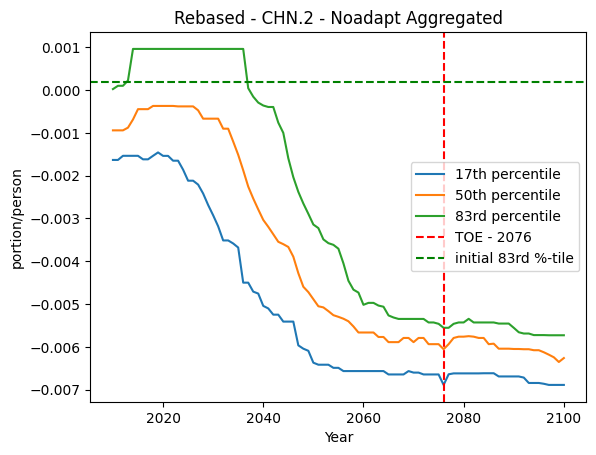

In [92]:
#titles and labels should be pulled from metadata
CKT_rolling_17th.plot(label="17th percentile")
CKT_rolling_50th.plot(label="50th percentile")
CKT_rolling_83rd.plot(label="83rd percentile")

x = [39,59,79,99,119]
labels = ['2020', '2040','2060','2080','2100']
plt.title("Rebased - CHN.2 - Noadapt Aggregated")
plt.ylabel("portion/person")
plt.xlabel("Year")
plt.axvline(x=95, linestyle='--',c='r' ,label = "TOE - 2076")
plt.axhline(y=0.000186, linestyle='--',c='g', label = "initial 83rd %-tile")
plt.legend()
plt.xticks(x, labels)
#np.nearest - or find all the years 83rd is below initial 17th, look at just histclim, RCP8.5, RCP4.5, and the differences between the RCP's and histclim
#get 30 year windows, randomly resample a lot of times (1000 or so), and subtract 
#np.random.choice()


In [ ]:
a = np.where(0.000186 >=BEI_rolling_17th)
a
BEI_rolling_83rd
#call on first non nan value, or drop nans, replace number with variable 

In [ ]:

fig = px.ecdf(DEL1['rebased'], x='rebased', title = "30yr CDF's - Climtas_effect - IND.10.121")

fig.add_trace(px.ecdf(DEL2['rebased'], x='rebased').data[0])

fig.add_trace(px.ecdf(DEL3['rebased'], x='rebased').data[0])

fig.add_trace(px.ecdf(DEL4['rebased'], x='rebased').data[0])

fig.update_layout(showlegend=True)

fig.show()
#fig.title("CDF - Climtas_effect - IND.10.121 - Histclim_aggregated")

In [ ]:
##plots - regions: DEL, OSL, CHI, SPB, ACC, SYD, BEI
#regions: IND.10.121.371, NOR.12.288, USA.14.608, BRA.25.5235.9888, GHA.5.70, AUS.4.275, CHN.2.18.84

BEI['climtas_effect'].plot()

plt.title('Direct marginal response - CHN.2.18.84')   #make sure to change ID
plt.xlabel('year')
plt.ylabel('100,000 * death/population')




In [ ]:
IND

In [ ]:
plt.plot(year,costs_ub[:,24377])
plt.plot(year,costs_lb[:,24377])
plt.title('Cost of adaptation BWA.4.13')
plt.xlabel('year')
plt.ylabel('deaths/100000')

In [ ]:
spreadsheet = pd.read_csv('/Users/danielblanco/Documents/Mortality_Project/data/2_projection/5_climate_data/gcm_weights.csv')
spreadsheet